In [ ]:
# boston houseprice data from kaggle using PolynomialFeatures and Ridge model

In [ ]:
! kaggle datasets download fedesoriano/the-boston-houseprice-data

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data
License(s): copyright-authors
the-boston-houseprice-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip the-boston-houseprice-data.zip

Archive:  the-boston-houseprice-data.zip
replace boston.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

df = pd.read_csv("boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("MEDV", axis=1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (51, 13), (455,), (51,))

In [ ]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

X_train_prepared = num_pipeline.fit_transform(X_train)
X_test_prepared = num_pipeline.transform(X_test)

X_train_prepared = pd.DataFrame(X_train_prepared, columns=X_train.columns)
X_test_prepared = pd.DataFrame(X_test_prepared, columns=X_test.columns)

X_train_prepared.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.416942,0.344513,-1.117966,-0.270395,-0.960137,0.943640,-1.102673,0.654891,-0.523106,-1.144555,-1.601746,0.398294,-1.108176
1,-0.280002,-0.499723,-0.421068,-0.270395,-0.145806,-0.222195,0.832605,0.069475,-0.638367,-0.601866,1.175568,0.448420,0.863237
2,-0.408091,-0.499723,-0.360216,-0.270395,-0.299938,0.679704,0.108207,-0.448063,-0.523106,-0.142668,1.130038,0.434251,-0.678455
3,-0.359270,0.344513,-1.025240,-0.270395,0.171021,1.652175,-0.555824,-0.440721,-0.523106,-0.858301,-2.466811,0.377578,-1.307689
4,-0.000352,-0.499723,1.021988,-0.270395,0.239524,0.017747,-0.580681,0.076309,1.666847,1.539070,0.811330,0.359545,-0.272453


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_prepared)
X_test_poly = poly_features.transform(X_test_prepared)

X_train_poly = pd.DataFrame(X_train_poly, columns=poly_features.get_feature_names_out())
X_test_poly = pd.DataFrame(X_test_poly, columns=poly_features.get_feature_names_out())

X_train_poly.shape, X_test_poly.shape

((455, 104), (51, 104))

In [ ]:
pd.set_option("display.max_columns", None)
X_train_poly.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM^2,CRIM ZN,CRIM INDUS,CRIM CHAS,CRIM NOX,CRIM RM,CRIM AGE,CRIM DIS,CRIM RAD,CRIM TAX,CRIM PTRATIO,CRIM B,CRIM LSTAT,ZN^2,ZN INDUS,ZN CHAS,ZN NOX,ZN RM,ZN AGE,ZN DIS,ZN RAD,ZN TAX,ZN PTRATIO,ZN B,ZN LSTAT,INDUS^2,INDUS CHAS,INDUS NOX,INDUS RM,INDUS AGE,INDUS DIS,INDUS RAD,INDUS TAX,INDUS PTRATIO,INDUS B,INDUS LSTAT,CHAS^2,CHAS NOX,CHAS RM,CHAS AGE,CHAS DIS,CHAS RAD,CHAS TAX,CHAS PTRATIO,CHAS B,CHAS LSTAT,NOX^2,NOX RM,NOX AGE,NOX DIS,NOX RAD,NOX TAX,NOX PTRATIO,NOX B,NOX LSTAT,RM^2,RM AGE,RM DIS,RM RAD,RM TAX,RM PTRATIO,RM B,RM LSTAT,AGE^2,AGE DIS,AGE RAD,AGE TAX,AGE PTRATIO,AGE B,AGE LSTAT,DIS^2,DIS RAD,DIS TAX,DIS PTRATIO,DIS B,DIS LSTAT,RAD^2,RAD TAX,RAD PTRATIO,RAD B,RAD LSTAT,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,-0.416942,0.344513,-1.117966,-0.270395,-0.960137,0.943640,-1.102673,0.654891,-0.523106,-1.144555,-1.601746,0.398294,-1.108176,1.738408e-01,-0.143642,0.466127,0.112739,0.400321,-0.393443,0.459751,-0.273052,0.218105,0.477213,0.667836,-0.166065,0.462045,0.118689,-0.385154,-0.093155,-0.330780,0.325097,-0.379886,0.225619,-0.180217,-0.394314,-0.551823,0.137218,-0.381781,1.249848,0.302292,1.073400,-1.054958,1.232751,-0.732146,0.584815,1.279573,1.790698,-0.445279,1.238903,0.073113,0.259616,-0.255155,0.298157,-0.177079,0.141445,0.309481,0.433103,-0.107696,0.299645,0.921862,-0.906024,1.058717,-0.628785,0.502253,1.098929,1.537895,-0.382416,1.064000,0.890457,-1.040527,0.617982,-0.493624,-1.080048,-1.511472,0.375846,-1.045719,1.215888,-0.722131,0.576815,1.262070,1.766203,-0.439188,1.221956,0.428883,-0.342578,-0.749559,-1.048970,0.260839,-0.725735,0.273640,0.598724,0.837883,-0.208350,0.579694,1.310005,1.833286,-0.455869,1.268367,2.565591,-0.637965,1.775016,0.158638,-0.441379,1.228053
1,-0.280002,-0.499723,-0.421068,-0.270395,-0.145806,-0.222195,0.832605,0.069475,-0.638367,-0.601866,1.175568,0.448420,0.863237,7.840090e-02,0.139923,0.117900,0.075711,0.040826,0.062215,-0.233131,-0.019453,0.178744,0.168523,-0.329161,-0.125558,-0.241708,0.249723,0.210417,0.135122,0.072863,0.111036,-0.416072,-0.034718,0.319007,0.300766,-0.587458,-0.224086,-0.431380,0.177298,0.113855,0.061394,0.093559,-0.350583,-0.029254,0.268796,0.253427,-0.494994,-0.188815,-0.363482,0.073113,0.039425,0.060080,-0.225132,-0.018786,0.172611,0.162741,-0.317867,-0.121250,-0.233415,0.021259,0.032397,-0.121399,-0.010130,0.093078,0.087756,-0.171405,-0.065382,-0.125865,0.049371,-0.185001,-0.015437,0.141842,0.133732,-0.261206,-0.099637,-0.191807,0.693230,0.057845,-0.531507,-0.501116,0.978783,0.373356,0.718735,0.004827,-0.044351,-0.041815,0.081673,0.031154,0.059973,0.407512,0.384211,-0.750444,-0.286256,-0.551062,0.362243,-0.707534,-0.269889,-0.519553,1.381960,0.527148,1.014794,0.201080,0.387093,0.745179
2,-0.408091,-0.499723,-0.360216,-0.270395,-0.299938,0.679704,0.108207,-0.448063,-0.523106,-0.142668,1.130038,0.434251,-0.678455,1.665379e-01,0.203932,0.147001,0.110345,0.122402,-0.277381,-0.044158,0.182850,0.213475,0.058221,-0.461158,-0.177214,0.276871,0.249723,0.180008,0.135122,0.149886,-0.339664,-0.054074,0.223907,0.261408,0.071294,-0.564706,-0.217005,0.339040,0.129756,0.097401,0.108043,-0.244841,-0.038978,0.161400,0.188431,0.051391,-0.407058,-0.156424,0.244391,0.073113,0.081102,-0.183788,-0.029259,0.121154,0.141445,0.038577,-0.305556,-0.117419,0.183451,0.089963,-0.203869,-0.032455,0.134391,0.156900,0.042792,-0.338941,-0.130249,0.203495,0.461998,0.073549,-0.304550,-0.355558,-0.096972,0.768092,0.295162,-0.461149,0.011709,-0.048484,-0.056604,-0.015438,0.122278,0.046989,-0.073414,0.200761,0.234385,0.063924,-0.506328,-0.194572,0.303991,0.273640,0.074630,-0.591130,-0.227160,0.354904,0.020354,-0.161220,-0.061954,0.096794,1.276986,0.490721,-0.766680,0.188574,-0.294620,0.460301
3,-0.359270,0.344513,-1.025240,-0.270395,0.171021,1.652175,-0.555824,-0.440721,-0.523106,-0.858301,-2.466811,0.377578,-1.307689,1.290748e-01,-0.123773,0.368338,0.097145,-0.061443,-0.593576,0.199691

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

print("Coefficient of Determination (R2 Score): ", lin_reg.score(X_test_prepared, y_test))

Coefficient of Determination (R2 Score):  0.7598135533532473


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

print("Coefficient of Determination (R2 Score): ", lin_reg.score(X_test_prepared, y_test))

Coefficient of Determination (R2 Score):  0.7598135533532473


In [ ]:
from sklearn.linear_model import LinearRegression

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

poly_reg.score(X_test_poly, y_test)

0.8597462440959538

In [ ]:
poly_reg.coef_

array([ 18.08648017,  16.07233998,   9.41748607,   0.14979453,
        -1.64656405,   3.46088396,  -1.93918958,  -2.75119932,
         5.15664128, -10.77829904,   1.64760967,   1.68663273,
        -3.23358128,   0.05808187,  45.79205009,  24.0822431 ,
         5.63012608,  -1.32487393,   1.17722891,  -0.81339017,
        -3.07280183,  16.33314038, -37.58126764,   9.08834257,
        -0.40698956,   1.97389465,  -0.30855776,  -0.79242771,
        -0.53147108,  -3.21036193,   0.40388693,   0.21358368,
        -0.64545979,  -1.49069968,   2.86395017,  -0.27866965,
         1.59438525,  -0.67146332,   2.39498526,  -0.32245873,
         0.46991125,   1.52947026,   0.59582688,   2.04734001,
        -0.60079857,   0.47693363,  -0.46769391,   2.09984117,
        -0.38917897,   0.51348143,  -0.93413828,  -0.96392799,
        -0.13117465,   0.59908753,  -0.70243091,   0.78823163,
        -0.55378598,   0.46505406,  -0.36817768,  -0.49199319,
         0.11582534,  -1.47606125,   3.94014865,  -2.27

In [ ]:
poly_reg.coef_
poly_reg.intercept_

27.906178859497402

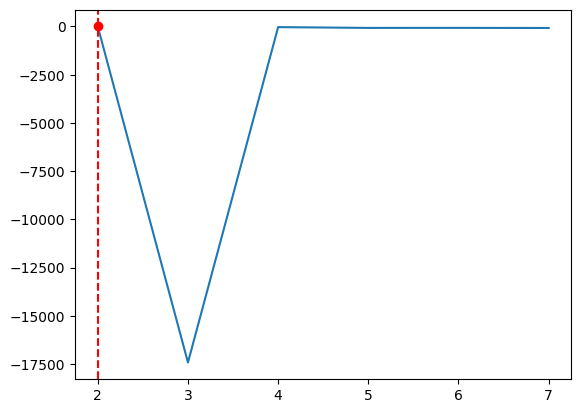

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

degree_list = range(2, 8)
score_list = []
for d in degree_list:
    poly_features = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train_prepared)
    X_test_poly = poly_features.transform(X_test_prepared)

    X_train_poly = pd.DataFrame(X_train_poly, columns=poly_features.get_feature_names_out())
    X_test_poly = pd.DataFrame(X_test_poly, columns=poly_features.get_feature_names_out())

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    score = poly_reg.score(X_test_poly, y_test)
    score_list.append(score)

df_score = pd.DataFrame({"degree": degree_list, "score": score_list}).sort_values(by="score", ascending=False)

plt.plot(degree_list, score_list)
plt.plot(df_score.iloc[0]["degree"], df_score.iloc[0]["score"], "ro")
plt.axvline(x=df_score.iloc[0]["degree"], color="red", linestyle="--")
plt.show()

In [ ]:
df_score

,degree,score
0,2,0.859746
2,4,-32.584044
4,6,-71.295759
3,5,-73.090067
5,7,-76.909781
1,3,-17419.917735


In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=60)
ridge_reg.fit(X_train_poly, y_train)
ridge_reg.score(X_test_poly, y_test)

-39.901587478052484

In [ ]:
ridge_reg.coef_

array([ 0.00554034, -0.02280115, -0.022445  , ...,  0.01577135,
       -0.01181303,  0.0127223 ])